In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import pywt
import cv2

In [2]:
texture = cv2.imread("texture.png",0)

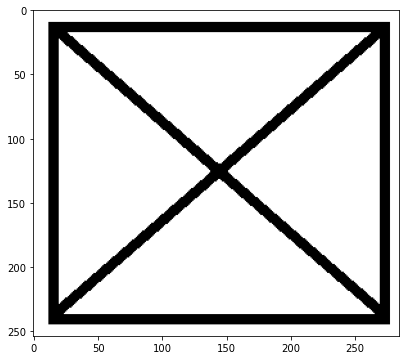

In [3]:
plt.figure(figsize=(12,6))
plt.imshow(texture, cmap = 'gray')
plt.show()

In [4]:
print(texture.shape)

(254, 285)


In [5]:
texture = cv2.resize(texture, (250, 250))

In [6]:
print(texture.shape)

(250, 250)


# Performing Single level 2D Wavelet Transform

## pywt.dwt2(data, wavelet, mode='symmetric', axes=(-2, -1))

In [7]:
coeffs_01 = pywt.dwt2(texture, 'db3', mode = 'periodization')  # Level = 1,  dwt.

In [8]:
CA, (CH, CV, CD) = coeffs_01

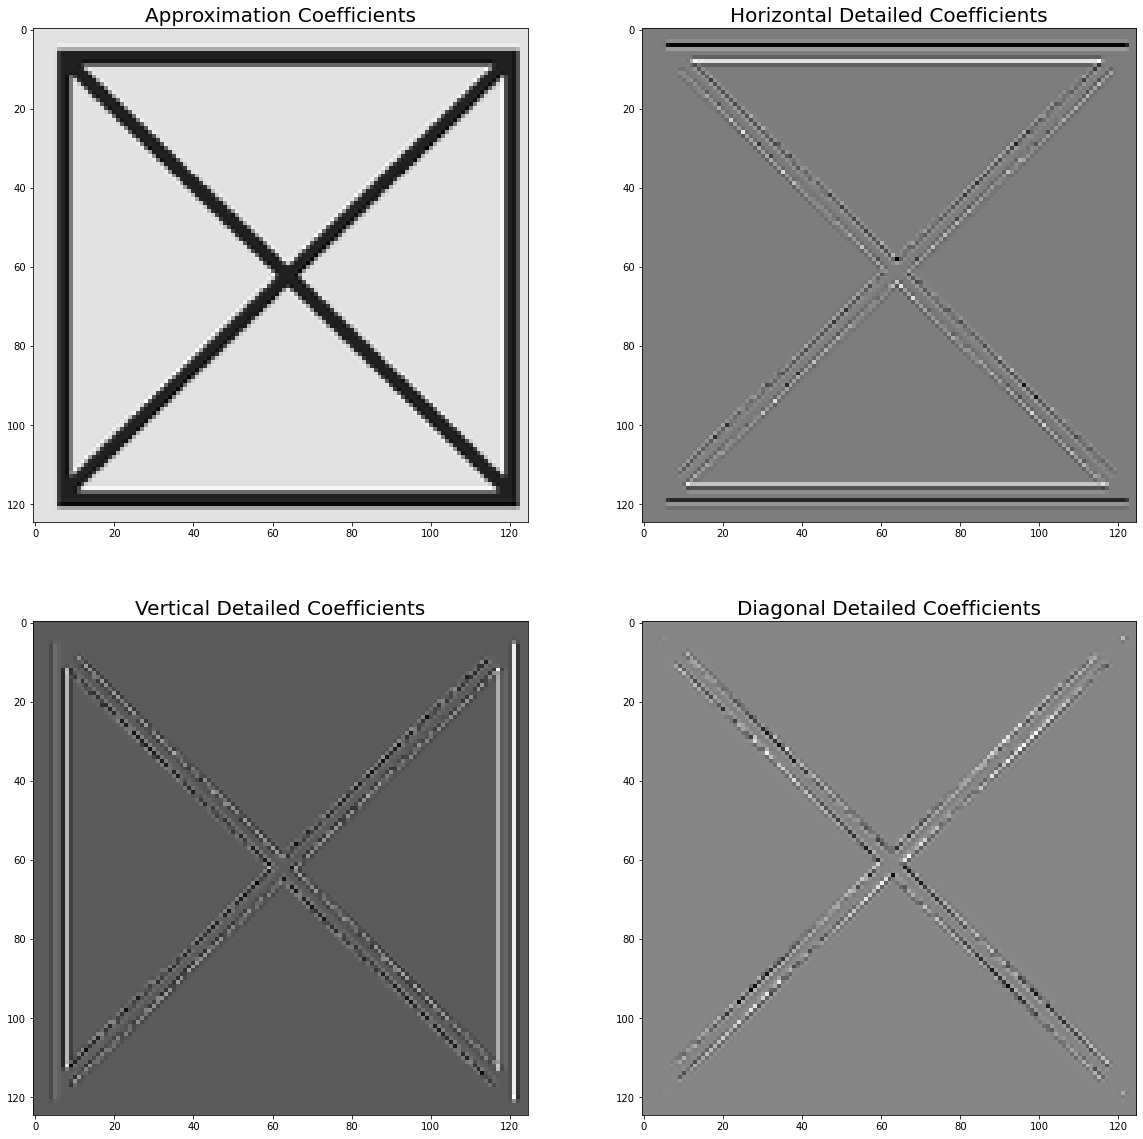

In [9]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(CA, cmap = 'gray')
plt.title("Approximation Coefficients", fontsize = 20)
plt.subplot(2,2,2)
plt.imshow(CH, cmap = 'gray')
plt.title("Horizontal Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,3)
plt.imshow(CV, cmap = 'gray')
plt.title("Vertical Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,4)
plt.imshow(CD, cmap = 'gray')
plt.title("Diagonal Detailed Coefficients", fontsize = 20)
plt.show()

In [10]:
print(CA.shape)
print(" ")
print(CH.shape)
print(" ")
print(CV.shape)
print(" ")
print(CD.shape)
print(" ")

(125, 125)
 
(125, 125)
 
(125, 125)
 
(125, 125)
 


# Image Reconstruction

## pywt.idwt2(coeffs, wavelet, mode='symmetric', axes=(-2, -1))

In [11]:
reconstruct_texture = pywt.idwt2(coeffs_01, 'db3', mode = 'periodization')  

In [12]:
reconstruct_texture = np.uint8(reconstruct_texture)

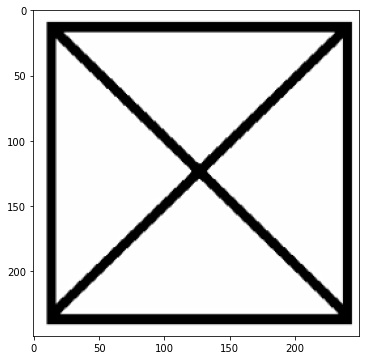

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(reconstruct_texture, cmap = 'gray')
plt.show()

In [14]:
print(reconstruct_texture.shape)

(250, 250)


# Another Example

In [15]:
img = cv2.imread("lena.tif",0)

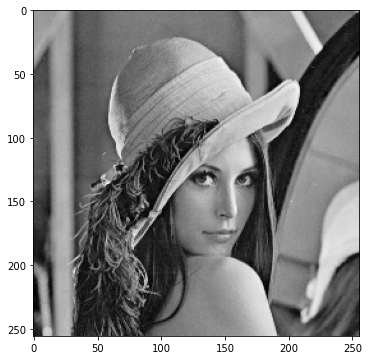

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(img, cmap = 'gray')
plt.show()

In [17]:
print(img.shape)

(256, 256)


In [18]:
coeffs_02 = pywt.dwt2(img, 'db3', mode = 'periodization')  # Level = 1,  dwt.

In [19]:
CA, (CH, CV, CD) = coeffs_02

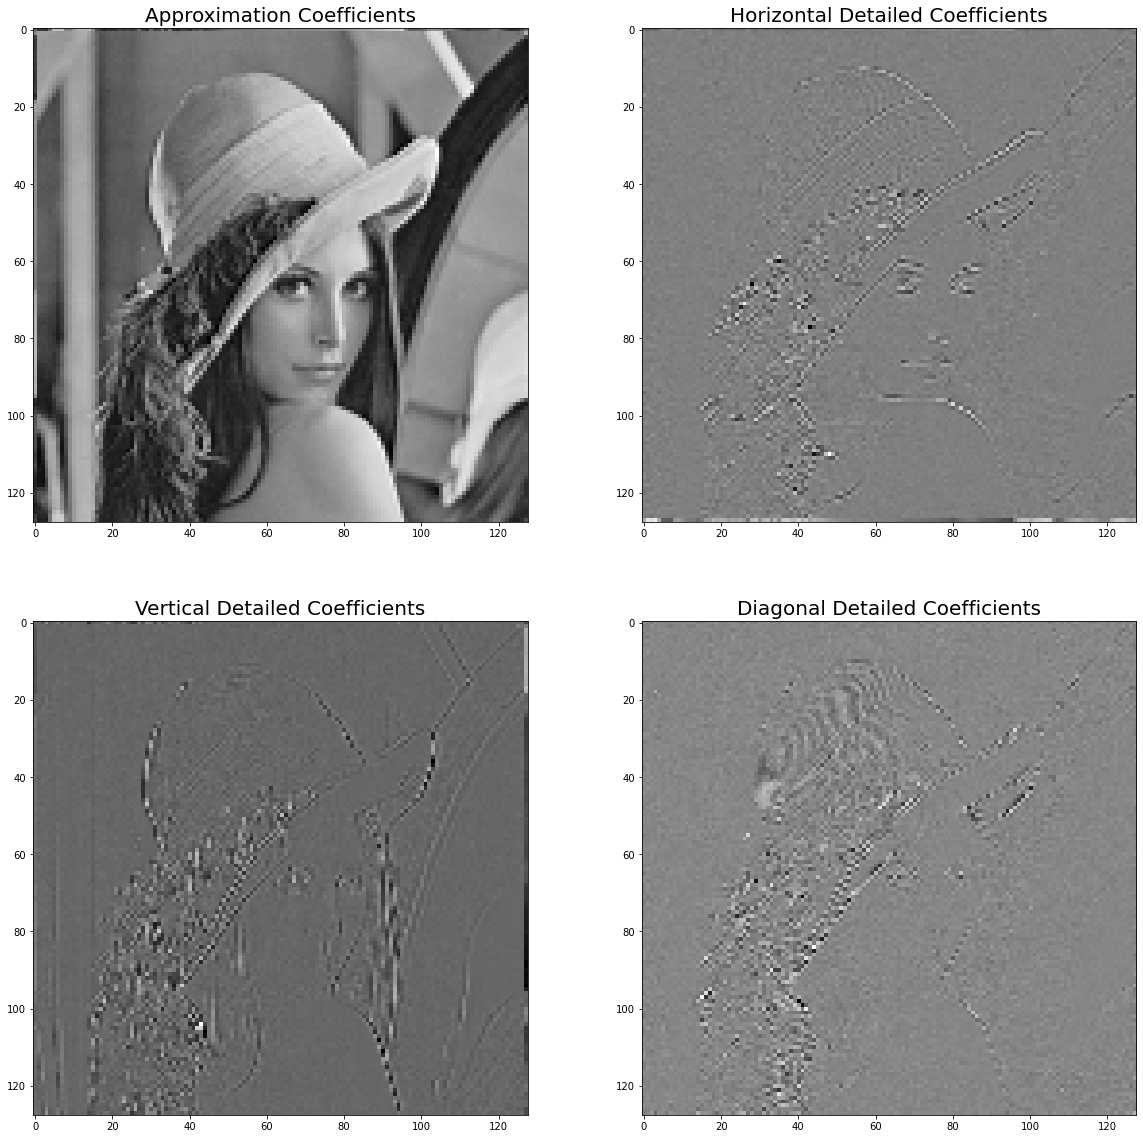

In [20]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(CA, cmap = 'gray')
plt.title("Approximation Coefficients", fontsize = 20)
plt.subplot(2,2,2)
plt.imshow(CH, cmap = 'gray')
plt.title("Horizontal Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,3)
plt.imshow(CV, cmap = 'gray')
plt.title("Vertical Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,4)
plt.imshow(CD, cmap = 'gray')
plt.title("Diagonal Detailed Coefficients", fontsize = 20)
plt.show()

# Image Reconstruction

In [21]:
reconstruct_img = pywt.idwt2(coeffs_02, 'db3', mode = 'periodization')  

In [22]:
reconstruct_img = np.uint8(reconstruct_img)

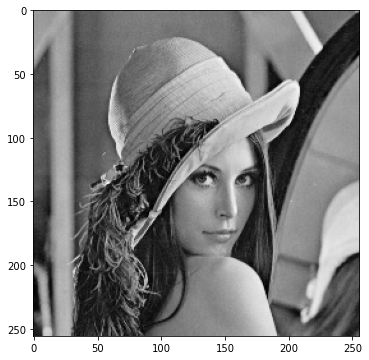

In [23]:
plt.figure(figsize=(12,6))
plt.imshow(reconstruct_img, cmap = 'gray')
plt.show()

# Multilevel Decomposition and Reconstruction

In [24]:
texture = cv2.imread("texture.png",0)

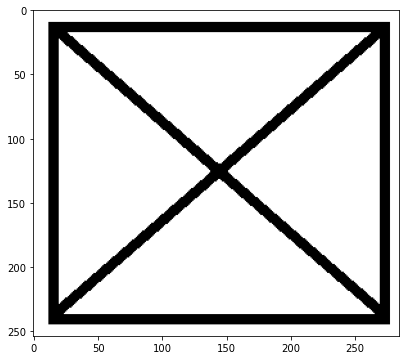

In [25]:
plt.figure(figsize=(12,6))
plt.imshow(texture, cmap = 'gray')
plt.show()

## pywt.wavedec2(data, wavelet, mode='symmetric', level=None, axes=(-2, -1))

In [26]:
coeffs = pywt.wavedec2(texture, 'db5', mode = 'periodization', level = 2) 

In [27]:
type(coeffs)

list

In [28]:
CA2, (CH2, CV2, CD2), (CH1, CV1, CD1) = coeffs

In [29]:
CA2 = coeffs[0]

In [30]:
(CH2, CV2, CD2) = coeffs[-2]

In [31]:
(CH1, CV1, CD1) = coeffs[-1]

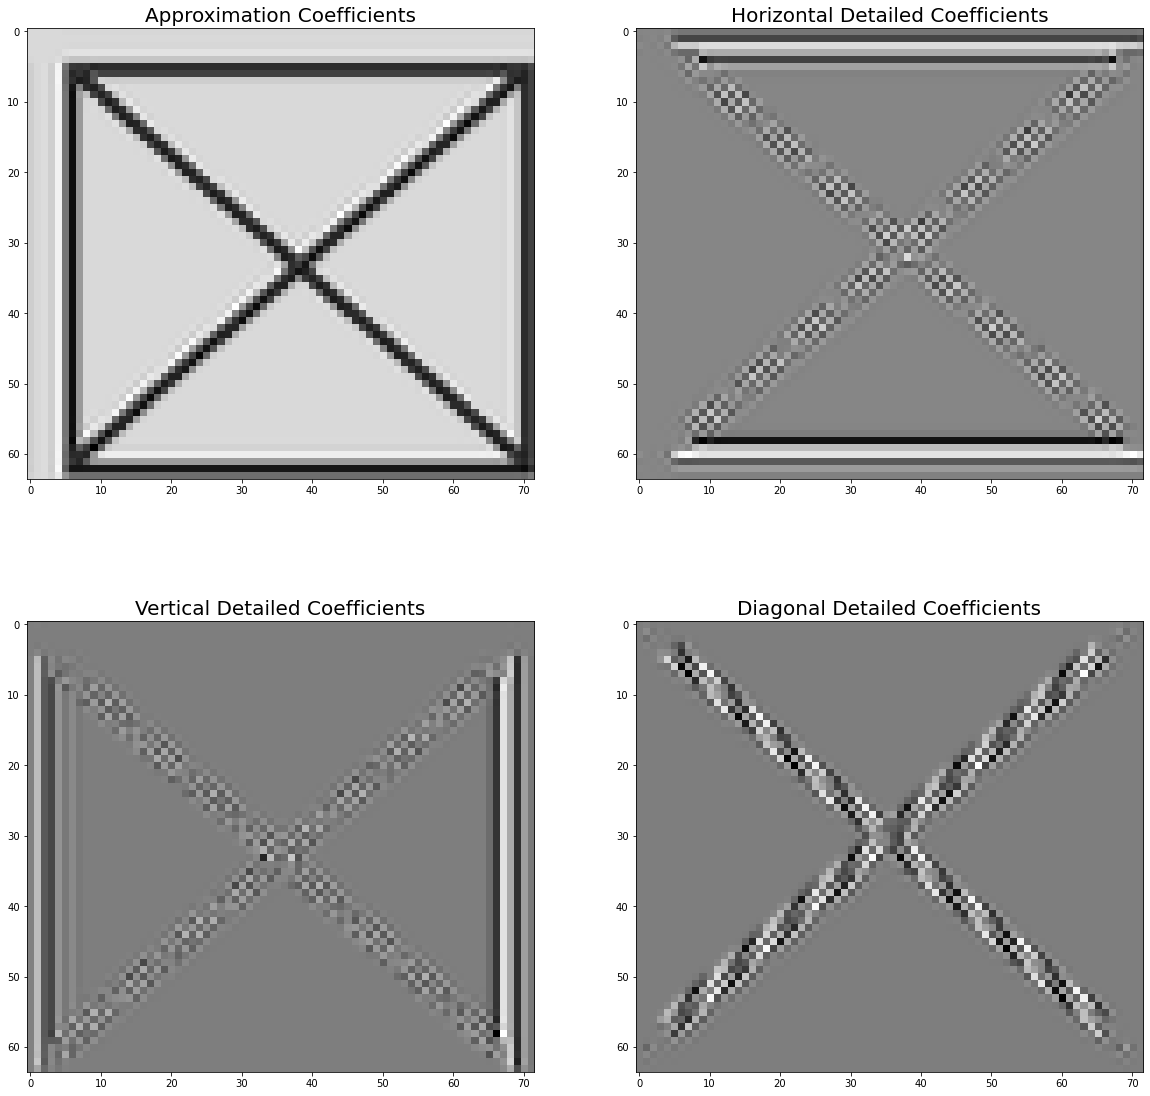

In [32]:
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
plt.imshow(CA2, cmap = 'gray')
plt.title("Approximation Coefficients", fontsize = 20)
plt.subplot(2,2,2)
plt.imshow(CH2, cmap = 'gray')
plt.title("Horizontal Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,3)
plt.imshow(CV2, cmap = 'gray')
plt.title("Vertical Detailed Coefficients", fontsize = 20)
plt.subplot(2,2,4)
plt.imshow(CD2, cmap = 'gray')
plt.title("Diagonal Detailed Coefficients", fontsize = 20)
plt.show()

# Showing All Levels in a single Figure

In [33]:
arr, coeffs_slices = pywt.coeffs_to_array(coeffs)

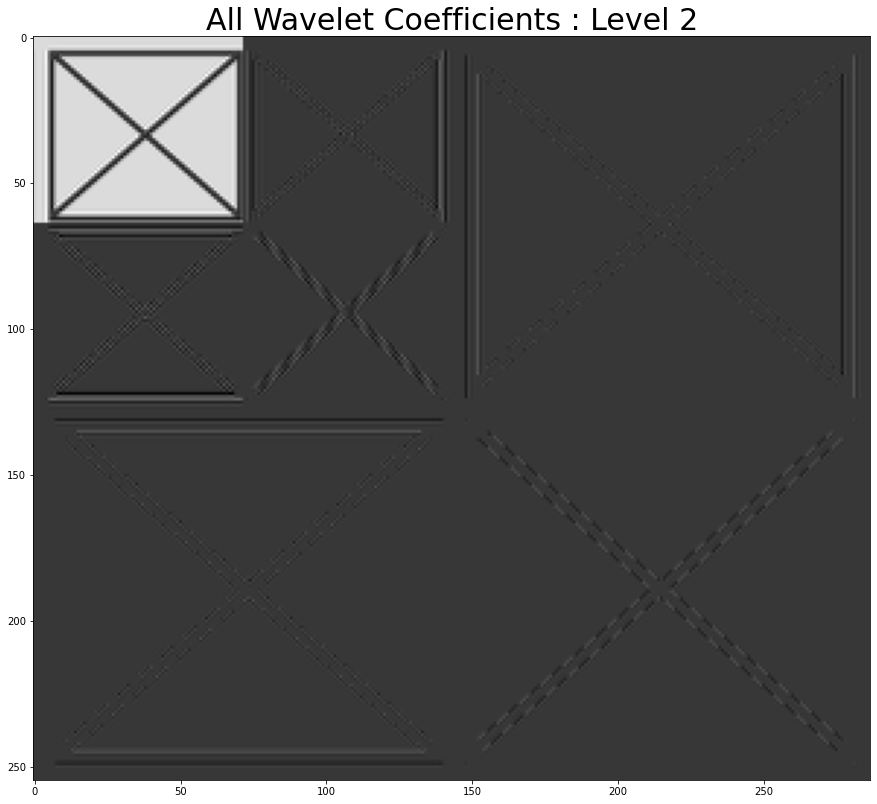

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(arr, cmap = 'gray')
plt.title("All Wavelet Coefficients : Level 2", fontsize = 30)
plt.show()

# Image Reconstruction

In [35]:
recon_Img = pywt.waverec2(coeffs, 'db5', mode = 'periodization') 

In [36]:
recon_Img = np.uint8(recon_Img)

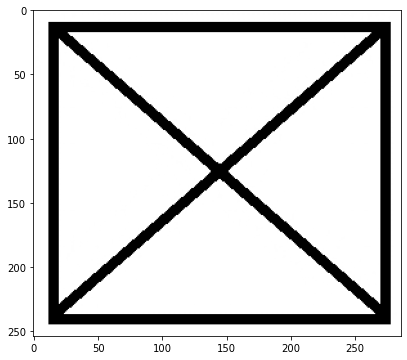

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(recon_Img, cmap = 'gray')
plt.show()

# Image Denoising Using Wavelet Transform

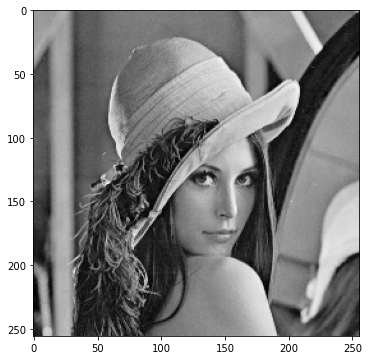

In [38]:
img = cv2.imread("lena.tif",0)
plt.figure(figsize=(12,6))
plt.imshow(img, cmap = 'gray')
plt.show()

## Generating Noise

In [39]:
matrix = np.zeros(img.shape, np.uint8)

In [40]:
noise = cv2.randn(matrix, mean = 0, stddev = 15)

In [41]:
Noisy_img = cv2.add(img, noise)

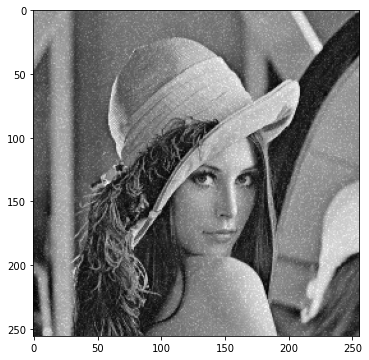

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(Noisy_img, cmap = 'gray')
plt.show()

In [43]:
denoisy_coeffs = pywt.dwt2(Noisy_img, 'db3', mode = 'periodization') 

In [44]:
CA, (CH, CV, CD) = denoisy_coeffs

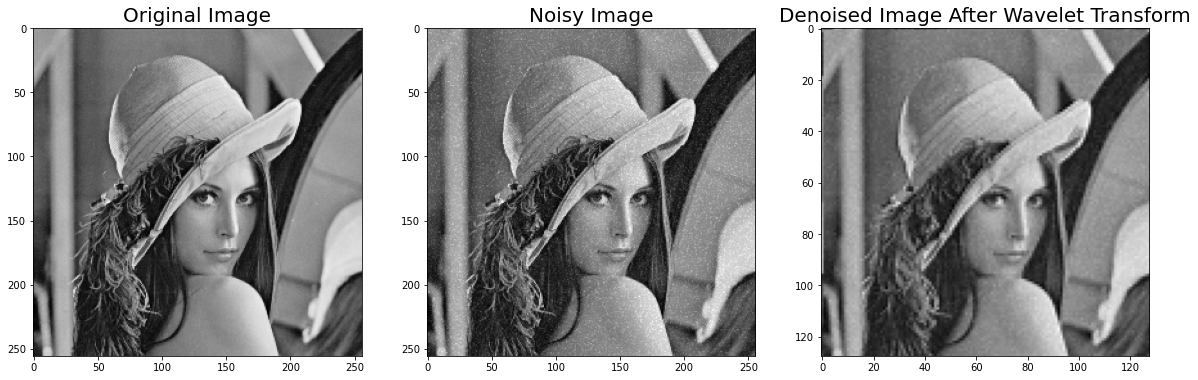

In [45]:
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title("Original Image", fontsize = 20)
plt.subplot(1,3,2)
plt.imshow(Noisy_img, cmap = 'gray')
plt.title("Noisy Image", fontsize = 20)
plt.subplot(1,3,3)
plt.imshow(CA, cmap = 'gray')
plt.title("Denoised Image After Wavelet Transform", fontsize = 20)
plt.show()